In [1]:
from process_data import get_data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\maxim\AppData\Local\Temp\ipykernel_25620\4178426324.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Import dataset
# data = get_data()
# je l'ai mis en coms car ca fait planter mon pc 

In [3]:
# Chargement du dataset
chemin_dataset = './consommation-annuelle-residentielle-par-adresse.csv'
data = pd.read_csv(chemin_dataset, delimiter=';')

print(data.head())
print("\n")  

C:\Users\maxim\AppData\Local\Temp\ipykernel_25620\4210216825.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(chemin_dataset, delimiter=';')


   annee  code_iris            nom_iris  numero_de_voie indice_de_repetition  \
0   2019  751145504   Petit Montrouge 4            75.0                    B   
1   2019  751145613        Plaisance 13            24.0                    B   
2   2019  751145513  Petit Montrouge 13            21.0                    B   
3   2019  751145620        Plaisance 20            16.0                    B   
4   2019  751207910    Pere Lachaise 10            16.0                  NaN   

  type_de_voie libelle_de_voie  code_commune nom_commune segment_de_client  \
0          RUE     DES PLANTES         75056       Paris       RESIDENTIEL   
1          RUE     DES PLANTES         75056       Paris       RESIDENTIEL   
2          RUE     DES PLANTES         75056       Paris       RESIDENTIEL   
3          RUE     DES PLANTES         75056       Paris       RESIDENTIEL   
4          RUE  DES PLATRIERES         75056       Paris       RESIDENTIEL   

   nombre_de_logements  consommation_annuelle_tota

In [4]:
#Affichage des informations sur le dataset
print(data.shape)
print(data.columns)
print(data.dtypes)

(1997648, 19)
Index(['annee', 'code_iris', 'nom_iris', 'numero_de_voie',
       'indice_de_repetition', 'type_de_voie', 'libelle_de_voie',
       'code_commune', 'nom_commune', 'segment_de_client',
       'nombre_de_logements', 'consommation_annuelle_totale_de_l_adresse_mwh',
       'consommation_annuelle_moyenne_par_site_de_l_adresse_mwh',
       'consommation_annuelle_moyenne_de_la_commune_mwh', 'adresse',
       'tri_des_adresses', 'code_epci', 'code_departement', 'code_region'],
      dtype='object')
annee                                                        int64
code_iris                                                   object
nom_iris                                                    object
numero_de_voie                                             float64
indice_de_repetition                                        object
type_de_voie                                                object
libelle_de_voie                                             object
code_commune         

In [5]:
# Affiche le nombre de valeurs manquantes par colonne
print(data.isnull().sum())

annee                                                            0
code_iris                                                        0
nom_iris                                                         0
numero_de_voie                                                   4
indice_de_repetition                                       1889397
type_de_voie                                                  7777
libelle_de_voie                                                  0
code_commune                                                     0
nom_commune                                                     58
segment_de_client                                                0
nombre_de_logements                                              0
consommation_annuelle_totale_de_l_adresse_mwh                    0
consommation_annuelle_moyenne_par_site_de_l_adresse_mwh          0
consommation_annuelle_moyenne_de_la_commune_mwh                  0
adresse                                                       

In [6]:
# Option 1: Suppression des lignes contenant des valeurs manquantes
# df_clean = data.dropna()

# Option 2: Imputation des valeurs manquantes
# Pour les variables numériques, remplacer par la moyenne ou la médiane
# data['nom_colonne_numerique'] = data['nom_colonne_numerique'].fillna(data['nom_colonne_numerique'].median())

# Pour les variables catégorielles,  remplacer par le mode ou une valeur spécifique
# data['nom_colonne_categorique'] = data['nom_colonne_categorique'].fillna(data['nom_colonne_categorique'].mode()[0])

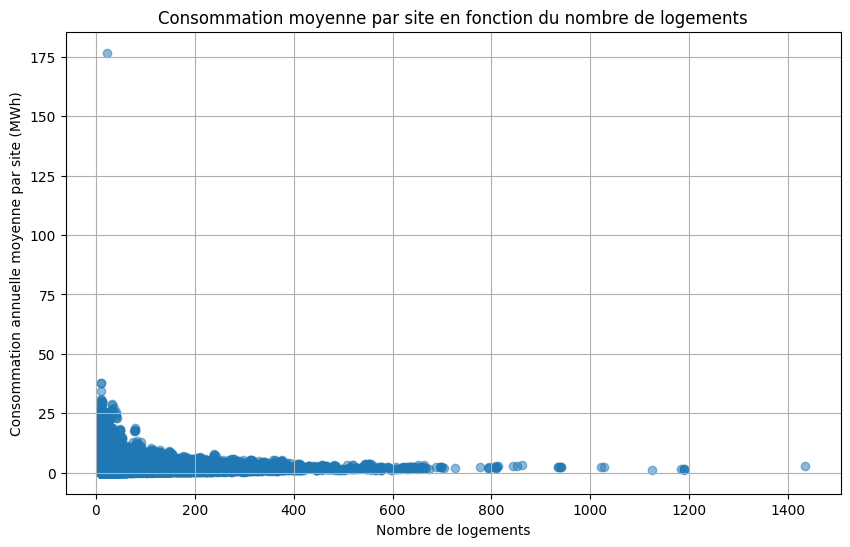

In [7]:
# Création d'un scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['nombre_de_logements'], data['consommation_annuelle_moyenne_par_site_de_l_adresse_mwh'], alpha=0.5)
plt.title('Consommation moyenne par site en fonction du nombre de logements')
plt.xlabel('Nombre de logements')
plt.ylabel('Consommation annuelle moyenne par site (MWh)')
plt.grid(True)
plt.show()


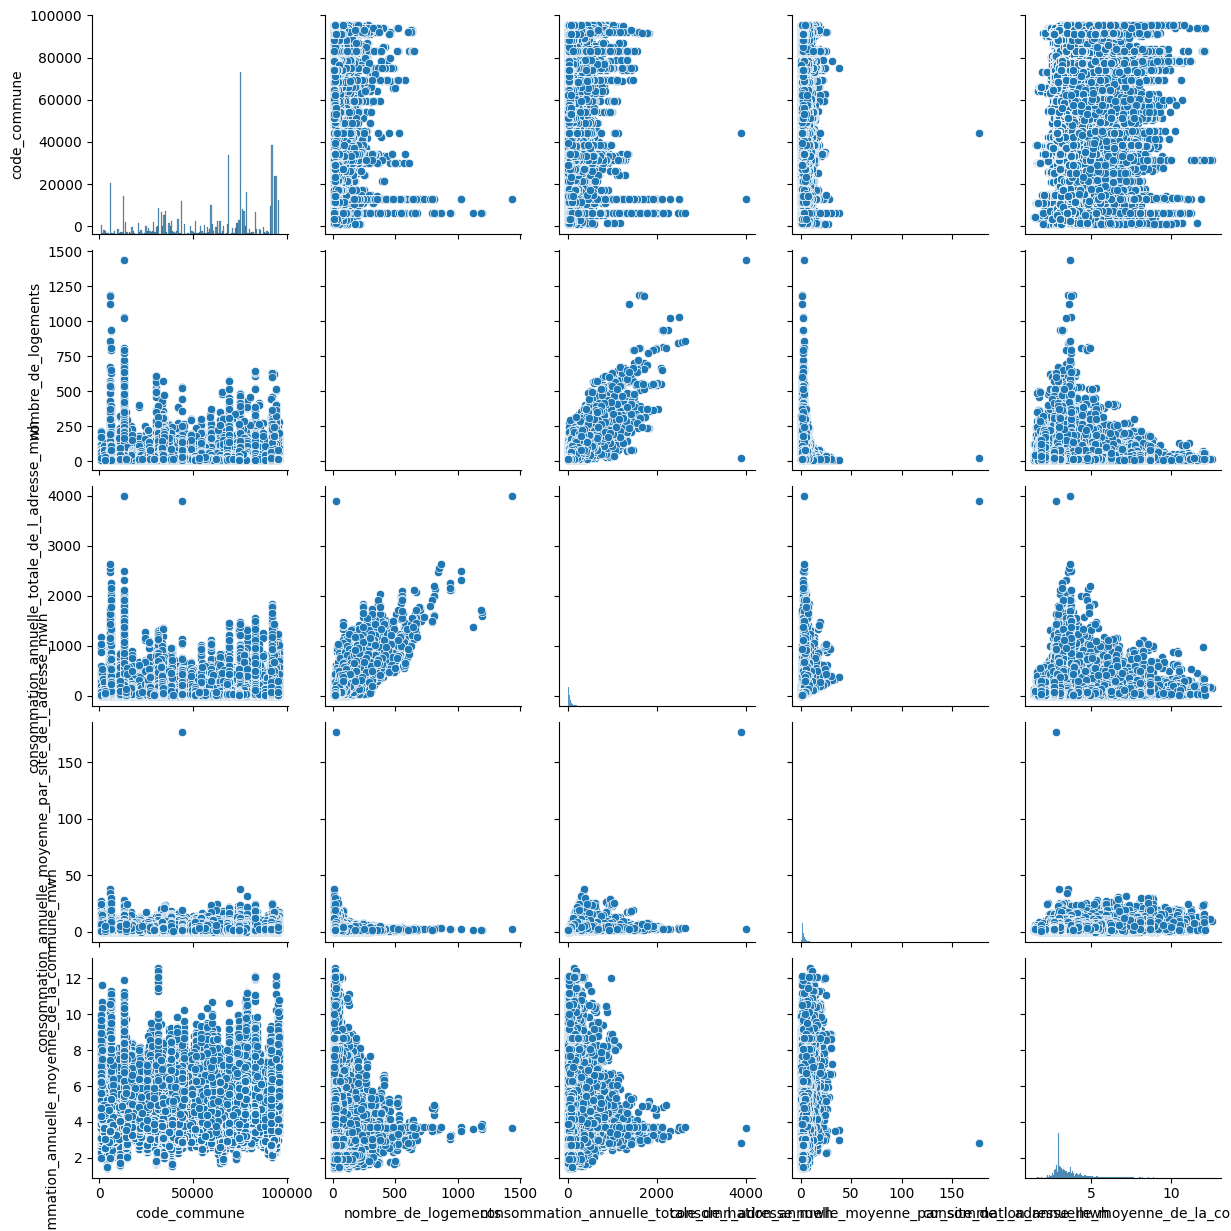

In [8]:
import seaborn as sns

# Sélection des colonnes d'intérêt
cols = [
    'code_iris',
    'nom_iris',
    'code_commune',
    'nombre_de_logements', 
    'segment_de_client',    
    'consommation_annuelle_totale_de_l_adresse_mwh',
    'consommation_annuelle_moyenne_par_site_de_l_adresse_mwh',
    'consommation_annuelle_moyenne_de_la_commune_mwh'
]

# Création d'un DataFrame avec uniquement les colonnes d'intérêt
df_interessant = data[cols]

# Génération du pairplot
sns.pairplot(df_interessant)
plt.savefig('pairplot.png')
plt.show()

 * Distribution de la consommation annuelle : Il semble y avoir une relation positive entre le **nombre_de_logements** et la **consommation_annuelle_totale_de_l_adresse_mwh**. Comme on pouvait s'y attendre, plus il y a de logements à une adresse, plus la consommation totale d'énergie est élevée. 

 *  Beaucoup de variables présentent une distribution asymétrique avec une longue traîne vers des valeurs plus élevées. Ce pourrait être indicatif de quelques adresses avec une consommation d'énergie très élevée, peut-être des immeubles de grande hauteur ou des complexes résidentiels importants.

# Remarque 

**Hypothèse 1 :** Raisons Météorologiques Affectant la Consommation Énergétique
* On peut effectuer un entraînement sur les données que nous avons par rapport à l'indice de répétition, puis compléter les cases après l'entraînement.

**Hypothèse 3 :** Nous savons qu'il y a un lien avec le nombre de logements, mais je ne vois pas ce que nous pouvons supposer pour formuler une hypothèse.

In [9]:

annee = data[:, 0:1]
m, n = annee.shape
X = np.concatenate((np.ones((m, 1)), annee), axis=1)
Pop = data[:, 1:2]

print(X.shape)
print(Pop.shape)

plt.scatter(annee,Pop)
plt.show()

InvalidIndexError: (slice(None, None, None), slice(0, 1, None))